
# EDA
<br>


### Import libraries

In [1]:
# nltk
from nltk import FreqDist

#sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# utilities
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# preferences
%matplotlib inline


### Read in dataset, preview first three rows, and display column and datatype info

In [2]:
# read tsv dataset into pandas df
path = 'data/'                                       #<---local directory path where dataset resides
filename = 'amazon_reviews_us_Luggage_v1_00_processed' #<---name of dataset being processed
ext = '.tsv'                                         #<---file extension (tab seperated values)

cols = ['TARGET',  #<---ratio of helpful votes to total votes above/below median
        'LEM',     #<---lemmas
        'STEM',    #<---stems
        'NOUN',    #<---percentage of nouns
        'ADJ',     #<---percentage of adjectives
        'ADV',     #<---percentage of adverbs
        'VERB',    #<---percentage of verbs
        'CHAR',    #<---number of characters
        'NUM',     #<---number of tokens
        'WORD',    #<---number of words
        'SENT',    #<---number of sentences
        'INTERRO', #<---number of questionss
        'EXCLAM',  #<---number of exclamations
        'COUNT',   #<---number of exclamation points
        'LEN',     #<---average word length
        'AVG',     #<---average sentence length
        'PER',     #<---percentage of questions
        'CAPS',    #<---percentage of capitalized characters
        'STAR',    #<---reviewer's star rating for product
        'MED',     #<---product's median star rating
        'FAV',     #<---reviewer's star rating vs product's median
        'POP',     #<---number of product's reviews
        'DAYS']    #<---days from review date to first review

df = pd.read_csv(path+filename+ext,
                 usecols = cols)

display(df.head(3))
df.info()

,TARGET,LEM,STEM,NOUN,ADJ,ADV,VERB,CHAR,NUM,WORD,...,COUNT,LEN,AVG,PER,CAPS,STAR,MED,FAV,POP,DAYS
0,1,"['strap', 'broke', 'supposed', 'anti', 'theft'...","['strap', 'broke', 'suppos', 'anti', 'theft', ...",0.440000,0.160000,0.080000,0.200000,318,25,63,...,3,5.047619,10.5,0.166667,0.031447,1,4.0,-3.0,23,2001
1,0,"['absolutely', 'thrilled', 'quality', 'leather...","['absolut', 'thrill', 'qualiti', 'leather', 'b...",0.166667,0.250000,0.416667,0.166667,136,12,26,...,3,5.230769,26.0,1.000000,0.029412,5,5.0,0.0,2,191
2,0,"['picking', 'luggage', '2', 'week', 'whirlwind...","['pick', 'luggag', '2', 'week', 'whirlwind', '...",0.370968,0.177419,0.096774,0.209677,728,62,140,...,2,5.200000,17.5,0.125000,0.020604,5,5.0,0.0,3,98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Data columns (total 23 columns):
TARGET     16242 non-null int64
LEM        16242 non-null object
STEM       16242 non-null object
NOUN       16242 non-null float64
ADJ        16242 non-null float64
ADV        16242 non-null float64
VERB       16242 non-null float64
CHAR       16242 non-null int64
NUM        16242 non-null int64
WORD       16242 non-null int64
SENT       16242 non-null int64
INTERRO    16242 non-null int64
EXCLAM     16242 non-null int64
COUNT      16242 non-null int64
LEN        16242 non-null float64
AVG        16242 non-null float64
PER        16242 non-null float64
CAPS       16242 non-null float64
STAR       16242 non-null int64
MED        16242 non-null float64
FAV        16242 non-null float64
POP        16242 non-null int64
DAYS       16242 non-null int64
dtypes: float64(10), int64(11), object(2)
memory usage: 2.9+ MB



### Examine distributions

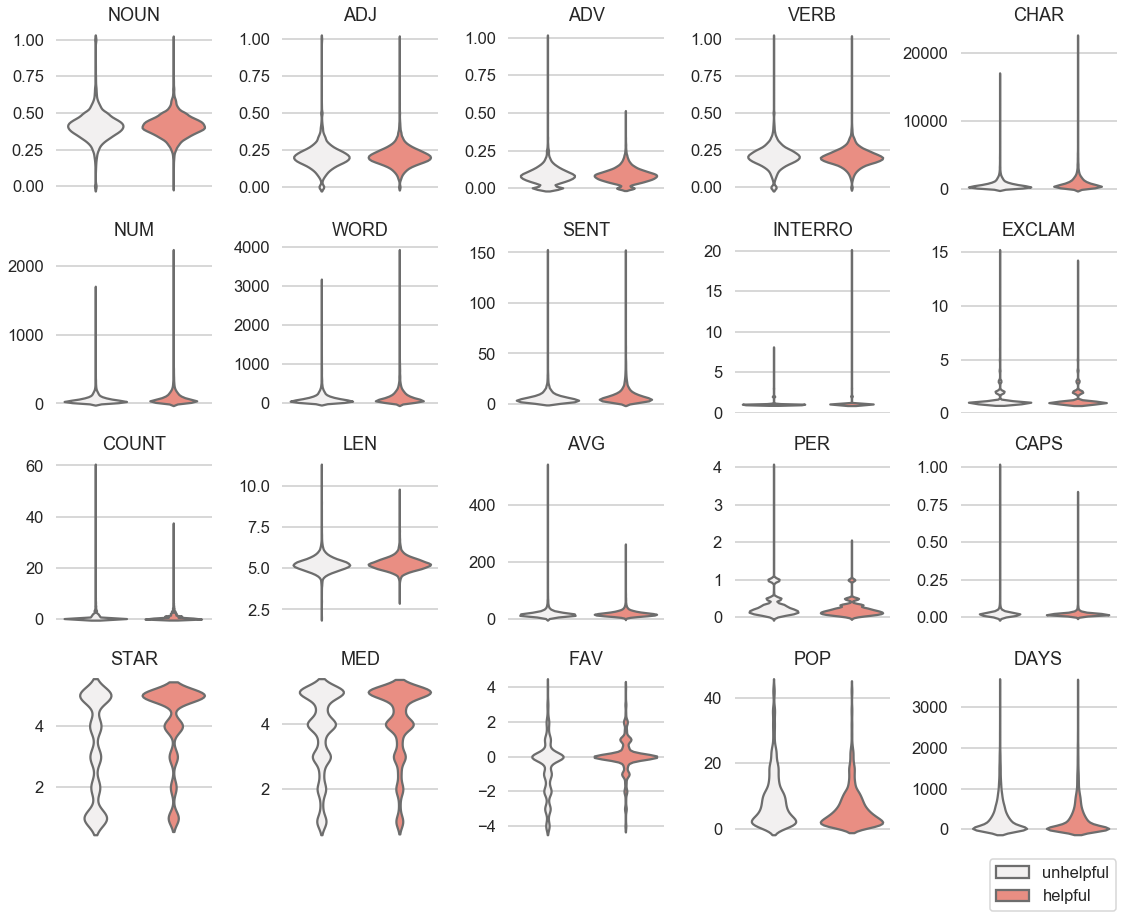

In [3]:
# plot feature distributions for helpful and unhelpful reviews
sns.set_style('whitegrid')
sns.set_context("talk")

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(19,15), facecolor='w')
plt.subplots_adjust(wspace=.45, hspace=.25)
sns.despine(bottom = True, left = True)


r = c = 0
for col in cols[3:]:
    sns.violinplot(data=df, y=df[col], x=df.TARGET,
                   ax=ax[r][c], legend_out = True,
                   inner=None, palette='light:salmon').set_title(col)
    
# ax[r][c].set_ylim(ymin=None, ymax=df[col].quantile(.995))
    ax[r][c].set_xticks([])
    ax[r][c].set_xlabel('')
    ax[r][c].set_ylabel('')

    if c != 4:
        c += 1
    else:
        r += 1
        c = 0

ax[3][4].legend(labels=['unhelpful','helpful'], bbox_to_anchor=(1.05, -0.05))

plt.savefig(fname='images/density', bbox_inches='tight', pad_inches=0.1)
plt.show()


### Examine correlations

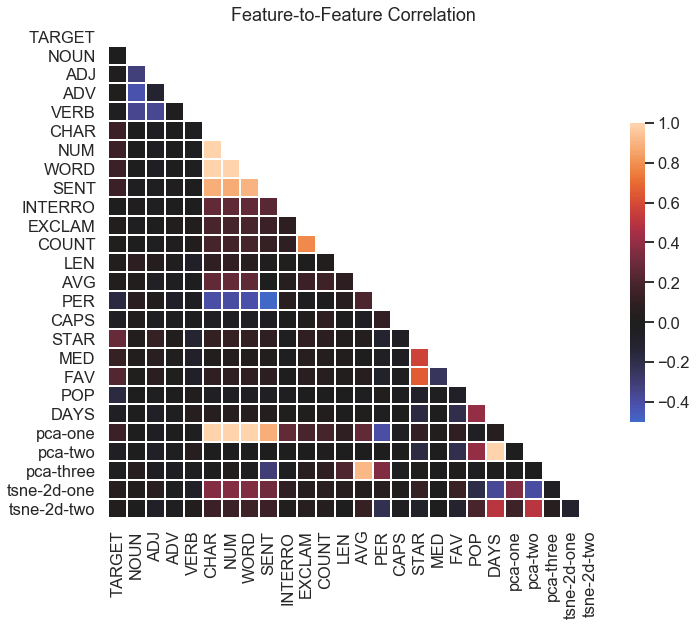

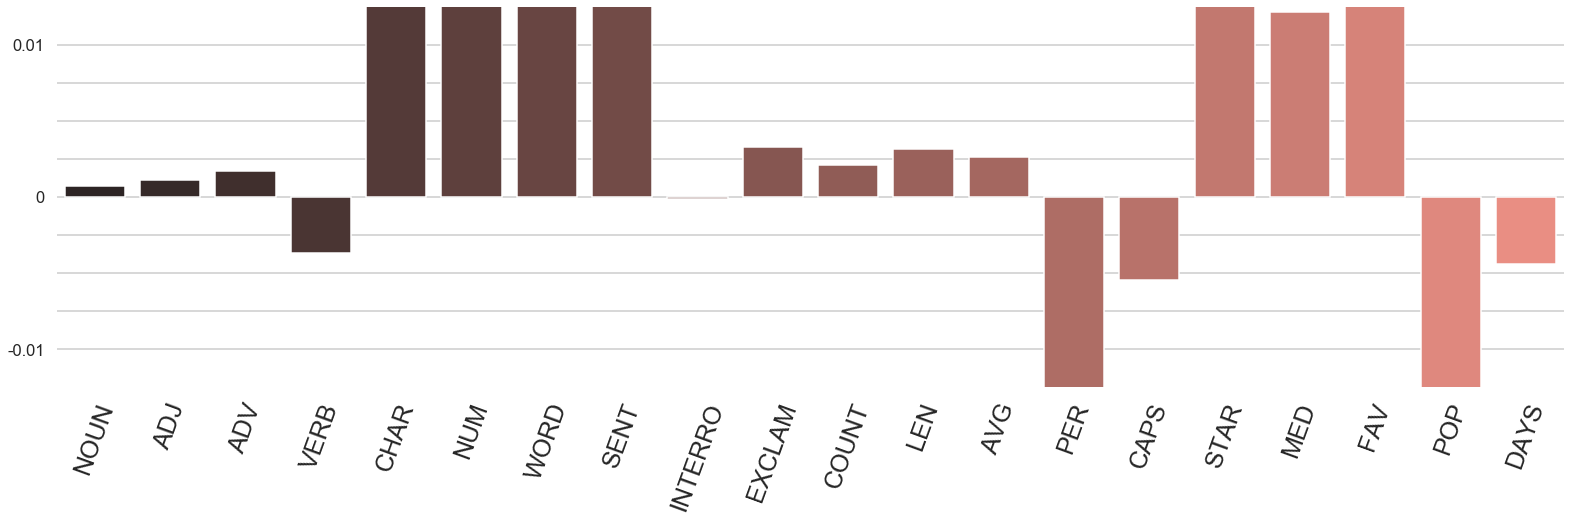

In [15]:
# plot pairwise correlations
sns.set_style('white')
sns.set_palette('dark:salmon')
sns.set_context("talk")

plt.figure(figsize=(11,11), facecolor='w')

sns.heatmap(
    df.corr(),
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
    vmin=-0.5, vmax=1, center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.5}).set_title('Feature-to-Feature Correlation')

plt.savefig(fname='images/corr_mtrx', bbox_inches='tight', pad_inches=0.1)
plt.show()

# plot target correlations
sns.set_style('whitegrid')
sns.set_context("talk")

x = df[cols[1:]].corrwith(df.TARGET).index
y = df[cols[1:]].corrwith(df.TARGET).values

plt.figure(figsize=(27,7), facecolor='w')
plt.xticks(rotation=70, fontsize=25)
plt.ylim(bottom=-.125, top=.125)
plt.yticks([-0.1,-0.075,-0.05,-0.025,0,0.025,0.05,0.075,0.1],
           [-0.01,'','','',0,'','','',0.01])

sns.despine(bottom=True, left=True)
sns.barplot(x=x, y=y, palette='dark:salmon')

plt.savefig(fname='images/corr_trgt', bbox_inches='tight', pad_inches=0.1)
plt.show()


### Examine token frequenies

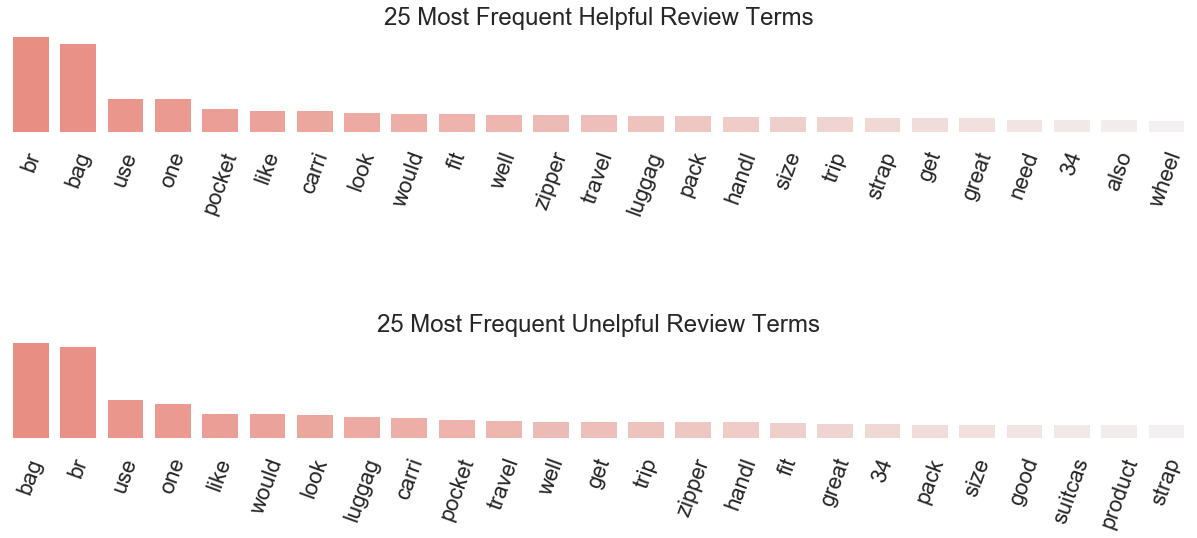

In [5]:
# helpful/unhelpful review token vocabularies
helpful_review_vocab = [word for review in df[df.TARGET==1].STEM for word in eval(review)]
helpful_review_vocab_freqdist = FreqDist(helpful_review_vocab)

unhelpful_review_vocab = [word for review in df[df.TARGET==0].STEM for word in eval(review)]
unhelpful_review_vocab_freqdist = FreqDist(unhelpful_review_vocab)

# plot helpful/unhelpful reviews' 25 most frequent tokens
sns.set_context("poster")
sns.set_style('white')

x1 = [k for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y1 = [v for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
x2 = [k for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y2 = [v for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,7), facecolor='w')
fig.tight_layout()

plt.subplots_adjust(hspace=2)
plt.Axes.set_facecolor(ax[0], color='white')
plt.Axes.set_facecolor(ax[1], color='white')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=70)
ax[0].set_yticks([])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=70)
ax[1].set_yticks([])

sns.despine(bottom = True, left = True)
sns.barplot(x=x1, y=y1, ax=ax[0], palette='light:salmon_r').set_title('25 Most Frequent Helpful Review Terms')
sns.barplot(x=x2, y=y2, ax=ax[1], palette='light:salmon_r').set_title('25 Most Frequent Unelpful Review Terms')
plt.savefig(fname='images/helpful_freqdist', bbox_inches='tight', pad_inches=.1)
plt.show()


### Examine PCA and t-SNE

In [6]:
# compute PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols[4:]])

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

# compute t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[cols[3:]])

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

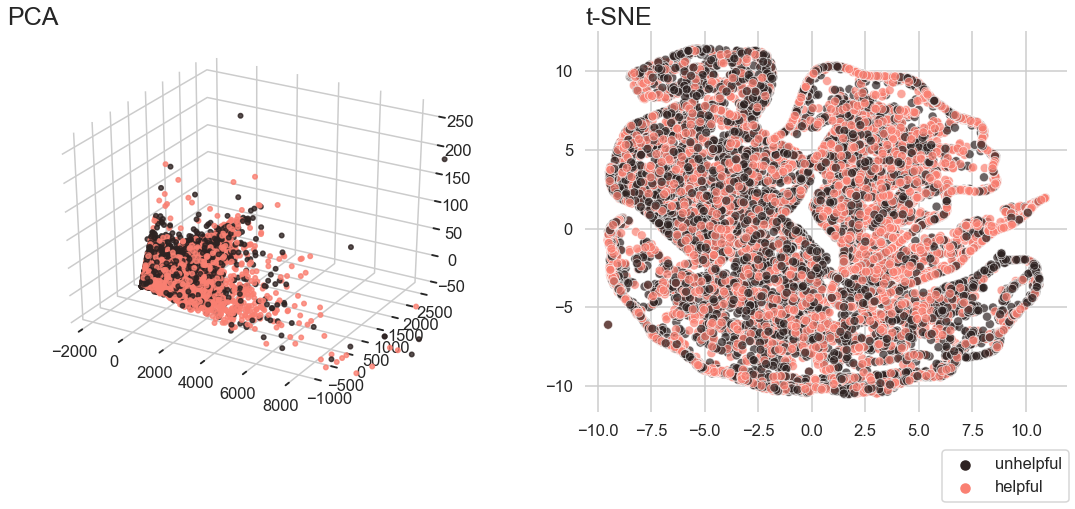

In [7]:
sns.set_style('whitegrid')
sns.set_context("talk")

fig = plt.figure(figsize=(19, 7))

# plot PCA
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('PCA', fontsize=25, loc='left')
ax.scatter(xs=df["pca-one"], 
           ys=df["pca-two"], 
           zs=df["pca-three"], 
           c=df["TARGET"],
           alpha=.8,
           cmap=sns.color_palette("dark:salmon", 2, as_cmap=True))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim(left=-2275, right=8625)
ax.set_ylim(bottom=-1250, top=2750)
ax.set_zlim(-52, 268)

# plot t-SNE
ax = fig.add_subplot(1, 2, 2)
ax.set_title('t-SNE', fontsize=25, loc='left')

sns.despine(left=True, bottom=True)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="TARGET",
                palette=sns.color_palette("dark:salmon", 2),
                data=df,
                legend='brief',
                alpha=.7,
                ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['unhelpful', 'helpful'], bbox_to_anchor=(1.02, -0.08))

plt.savefig(fname='images/PCA_tSNE', bbox_inches='tight', pad_inches=.1)
plt.show()